# LoC Data Package Tutorial: Austro-Hungarian maps set

This notebook will demonstrate basic usage of using the Pyton for interacting with [data packages from the Library of Congress](https://data.labs.loc.gov/packages/) via the [Austro-Hungarian map set](https://data.labs.loc.gov/austro-hungarian-maps/) which is derived from the Library's [Austria-Hungary Topographic Set Maps](https://guides.loc.gov/maps-genealogy-eastern-europe/topographic-sets/austria-hungary). We will:

1. [Output a summary of the contents of this data package](#Output-data-package-summary)
2. [Read and query metadata from a data package](#Query-the-metadata-in-a-data-package)
3. [Download and display images from a data package](#Download-and-display-images)

## Prerequisites

In order to run this notebook, please follow the instructions listed in [this directory's README](https://github.com/LibraryOfCongress/data-exploration/blob/master/Data%20Packages/README.md).

## Output data package summary

First, we will select the data package and output a summary of it's contents

In [4]:
import io

import pandas as pd                     # for reading, manipulating, and displaying data
import requests

from helpers import get_file_stats

DATA_URL = 'https://data.labs.loc.gov/austro-hungarian-maps/' # Base URL of this data package

# Download the file manifest
file_manifest_url = f'{DATA_URL}manifest.json'
response = requests.get(file_manifest_url, timeout=60)
response_json = response.json()
files = [dict(zip(response_json["cols"], row)) for row in response_json["rows"]] # zip columns and rows

# Convert to Pandas DataFrame and show stats table
stats = get_file_stats(files)
pd.DataFrame(stats)

FileType  Count        Size
0     .tif  9,881  1,142.47GB

## Read the metadata in a data package

First, let's load the data package's `metadata.csv` file:

In [6]:
metadata_url = f'{DATA_URL}metadata.csv'
response = requests.get(metadata_url, timeout=60)
metadata_string = response.text

# Read contents as a csv file
df = pd.read_csv(io.StringIO(metadata_string), dtype=str, keep_default_na=False)
print(f'Loaded metadata file with {df.shape[0]:,} entries.')

Loaded metadata file with 9,885 entries.


Next let's print the available properties

In [7]:
print(', '.join(df.columns.to_list()))

filepath, filename, parent_dir, file_format, object_type, tile_id, edition


## Download and visualize GeoTIFF

Next we will download a GeoTIFF file and visualize it.

First, let's filter to only the GeoTIFF files and take the first one

In [8]:
geotiffs = df[df.file_format == 'GeoTIFF']
print(f'Found {geotiffs.shape[0]:,} GeoTIFF files.')
item = geotiffs.iloc[0]

Found 4,877 GeoTIFF files.


Next download the GeoTIFF file, display it, and visualize a specific band

Opened GeoTIFF file with 3 bands and dimensions: 8,767 x 4,384


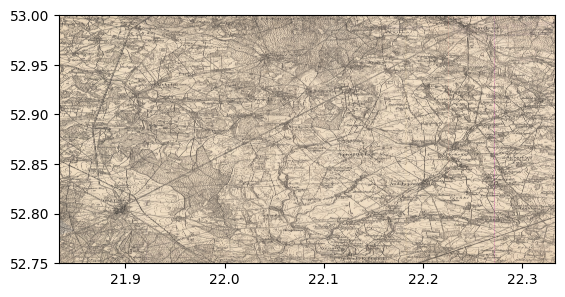

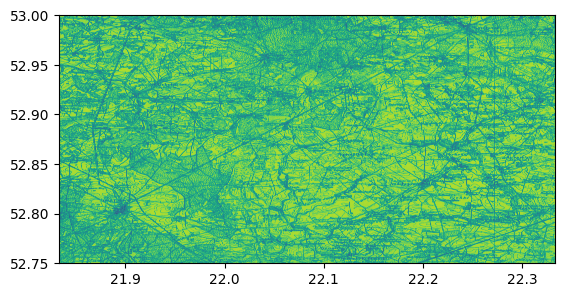

In [9]:
from rasterio.io import MemoryFile
from rasterio.plot import show

filename = f"data/{item['parent_dir']}/{item['filename']}"
obj_url = f"{DATA_URL}{filename}"
response = requests.get(obj_url, timeout=60)
filestream = io.BytesIO(response.content)

with MemoryFile(filestream) as memfile:
     with memfile.open() as dataset:
         print(f"Opened GeoTIFF file with {dataset.count} bands and dimensions: {dataset.width:,} x {dataset.height:,}")
         show(dataset)
         visualize_band = 2
         show(dataset.read(visualize_band), transform=dataset.transform, cmap='viridis')
